# Rock, Paper and Scissors


Extract Dataset


In [16]:
import os
import zipfile

local_zips = ["rps-test-set.zip", "rps.zip"]
for local_zip in local_zips:
    zip_ref = zipfile.ZipFile(local_zip, "r")
    zip_ref.extractall("tmp/")
    zip_ref.close()

Check Dataset


In [17]:
loc = "tmp/rps/"
rock_dir = os.path.join(loc + "rock")
paper_dir = os.path.join(loc + "paper")
scissors_dir = os.path.join(loc + "scissors")

print("total training rock images:", len(os.listdir(rock_dir)))
print("total training paper images:", len(os.listdir(paper_dir)))
print("total training scissors images:", len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock01-000.png', 'rock01-001.png', 'rock01-002.png', 'rock01-003.png', 'rock01-004.png', 'rock01-005.png', 'rock01-006.png', 'rock01-007.png', 'rock01-008.png', 'rock01-009.png']
['paper01-000.png', 'paper01-001.png', 'paper01-002.png', 'paper01-003.png', 'paper01-004.png', 'paper01-005.png', 'paper01-006.png', 'paper01-007.png', 'paper01-008.png', 'paper01-009.png']
['scissors01-000.png', 'scissors01-001.png', 'scissors01-002.png', 'scissors01-003.png', 'scissors01-004.png', 'scissors01-005.png', 'scissors01-006.png', 'scissors01-007.png', 'scissors01-008.png', 'scissors01-009.png']


Display Images


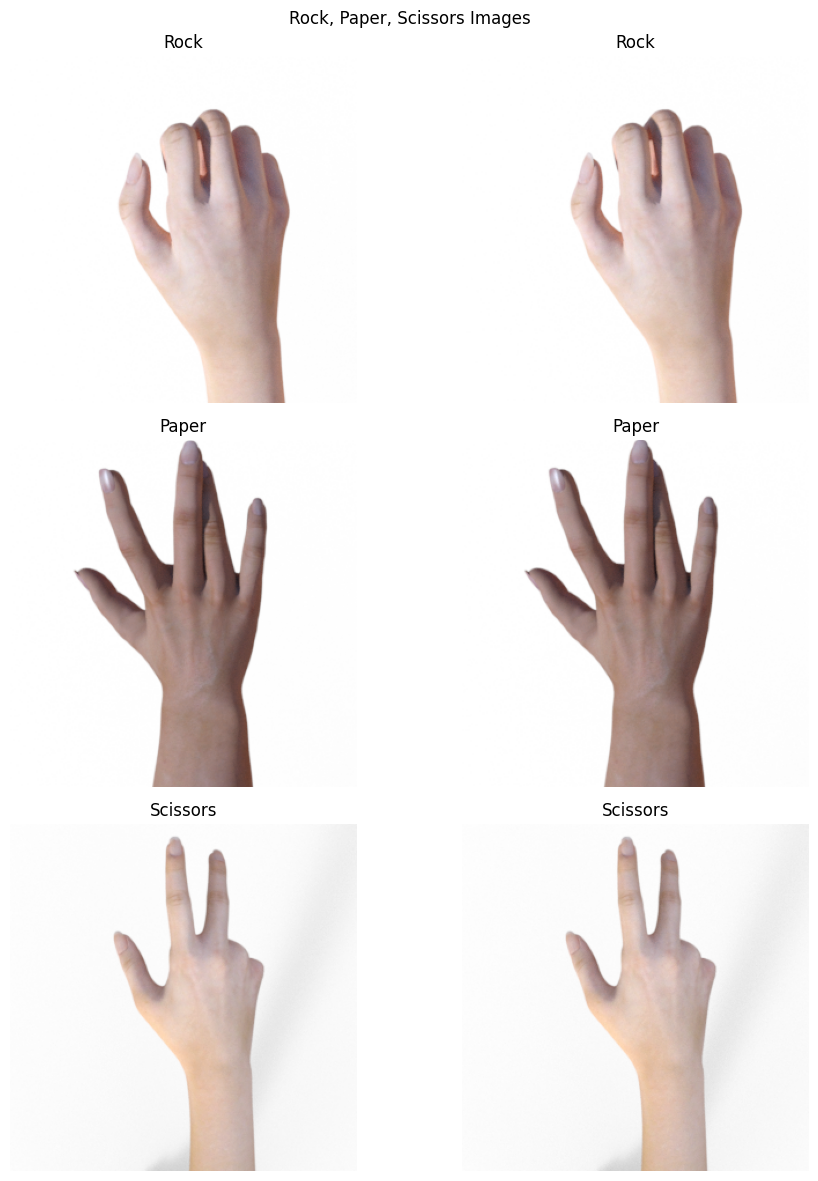

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [
    os.path.join(rock_dir, fname) for fname in rock_files[pic_index - 2 : pic_index]
]
next_paper = [
    os.path.join(paper_dir, fname) for fname in paper_files[pic_index - 2 : pic_index]
]
next_scissors = [
    os.path.join(scissors_dir, fname)
    for fname in scissors_files[pic_index - 2 : pic_index]
]

fig, axes = plt.subplots(3, 2, figsize=(10, 12))
fig.suptitle("Rock, Paper, Scissors Images")

for i, img_path in enumerate(next_rock + next_paper + next_scissors):
    img = mpimg.imread(img_path)
    row = i // 2
    col = i % 2
    axes[row, col].imshow(img)
    axes[row, col].axis("off")

    # Add title based on image type
    if i < 2:
        axes[row, col].set_title("Rock")
    elif i < 4:
        axes[row, col].set_title("Paper")
    else:
        axes[row, col].set_title("Scissors")

plt.tight_layout()
plt.show()

Dataset Pre processing


In [ ]:
# import tensorflow as tf
from tensorflow import keras
# pip install keras-preprocessing
from keras_preprocessing.image import ImageDataGenerator

# This folder should have subfolders like /rock, /paper, /scissors
TRAINING_DIR = "tmp/rps/"

# This does real-time image augmentation to help prevent overfitting
training_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values from [0, 255] to [0, 1]
    rotation_range=40,  # Randomly rotate images up to 40 degrees
    width_shift_range=0.2,  # Randomly shift images left/right by 20%
    height_shift_range=0.2,  # Randomly shift images up/down by 20%
    shear_range=0.2,  # Apply shearing (slanting) transformation
    zoom_range=0.2,  # Randomly zoom in/out by 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode="nearest",  # Fill in missing pixels after transform with nearest pixel value
)
# keras.utils.image_dataset_from_directory
VALIDATION_DIR = "tmp/rps-test-set/"
# No augmentation for validation data — only normalization
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,  # Path to training data directory
    target_size=(150, 150),  # Resize all images to 150x150
    class_mode="categorical",  # Because we have 3 classes: rock, paper, scissors, sets classes according to folder name
    batch_size=126,  # Number of images to load at once per batch
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,  # Path to validation data directory
    target_size=(150, 150),  # Resize images to match training input
    class_mode="categorical",  # Same one-hot encoded labels 
    batch_size=126,  # Same batch size (optional, can be different)
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


Define the Model

In [22]:
model = keras.models.Sequential(
    [
        # Note the input shape is the desired size of the image 150x150 with 3 bytes color
        keras.Input(shape=(150, 150, 3)),
        # This is the first convolution
        keras.layers.Conv2D(
            64, (3, 3), activation="relu"
        ),
        keras.layers.MaxPooling2D(2, 2),
        # The second convolution
        keras.layers.Conv2D(64, (3, 3), activation="relu"),
        keras.layers.MaxPooling2D(2, 2),
        # The third convolution
        keras.layers.Conv2D(128, (3, 3), activation="relu"),
        keras.layers.MaxPooling2D(2, 2),
        # The fourth convolution
        keras.layers.Conv2D(128, (3, 3), activation="relu"),
        keras.layers.MaxPooling2D(2, 2),
        # Flatten the results to feed into a DNN
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        # 512 neuron hidden layer
        keras.layers.Dense(512, activation="relu"),
        keras.layers.Dense(3, activation="softmax"),
    ]
)


model.summary()

model.compile(
    loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,473,475 (13.25 MB)

 Trainable params: 3,473,475 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

Train and Save

In [23]:
history = model.fit(
    train_generator,
    epochs=25,
    steps_per_epoch=20,
    validation_data=validation_generator,
    verbose=1,
    validation_steps=3,
)

model.save("rps.keras")

d:\coding\AI\learning-tensorflow\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 135s 7s/step - accuracy: 0.3148 - loss: 1.2061 - val_accuracy: 0.3575 - val_loss: 1.0847
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.3673 - loss: 1.0996 - val_accuracy: 0.6478 - val_loss: 1.0522
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step - accuracy: 0.4081 - loss: 1.0773 - val_accuracy: 0.7930 - val_loss: 0.9778
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.4767 - loss: 1.1210 - val_accuracy: 0.7016 - val_loss: 0.8218
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.5363 - loss: 0.9559 - val_accuracy: 0.6882 - val_loss: 0.6999
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.5568 - loss: 0.9018 - val_accuracy: 0.6667 - val_loss: 0.7205
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.6088 - loss: 0.8590 - val_accuracy: 0.8253 - val_loss: 0.6511
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.6644 - loss: 0.7193 - val_accuracy: 0.8306 - val_loss

Accuracy Graph

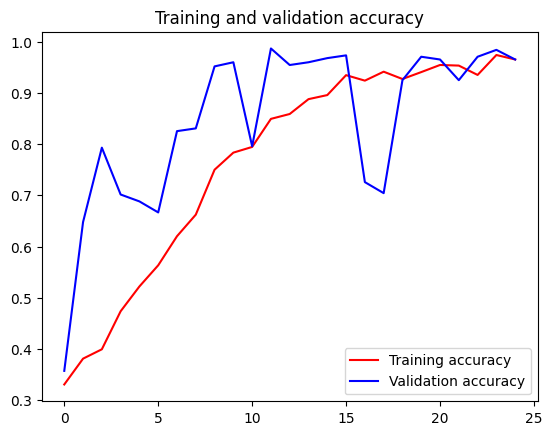

<Figure size 640x480 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Predict

In [50]:
import numpy as np
from keras.preprocessing import image

class_names = ["paper", "rock", "scissors"]
# Use your actual image file path
path = "test_images/test_rock.jpg"

# Load and preprocess the image
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)      # Add batch dimension
x /= 255.0                         # Normalize like training data

# Predict using your trained model
predictions = model.predict(x)
print(predictions)
predicted_class = class_names[np.argmax(predictions)]
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
[[0.12656991 0.7049842  0.1684459 ]]
Predicted class: rock
